<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_06/lab_06.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_06/data/anscombe.csv")

df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

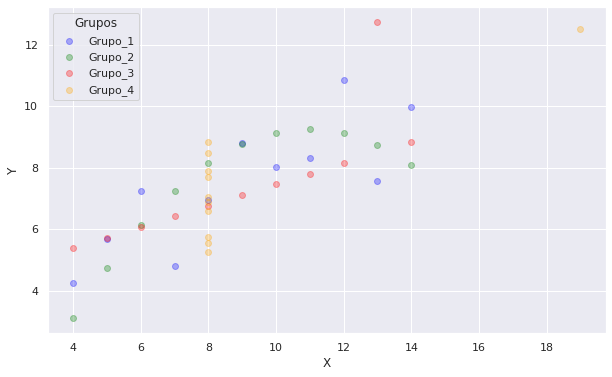

Los grupos son muy diferentes entre si, por ejemplo, el grupo 1 (azul) se ve una clara dispersión con una tendencia lineal,
el grupo 2 en verde tiene una forma parábolica, el grupo 3 es lineal pero tiene un dato alejado de la tendencia,
y en el grupo 4 los valores en el eje Y son constantes.


In [4]:
# pregunta 1
color_map = dict(zip(df["grupo"].unique(), ["blue", "green", "red",'orange']))
plt.figure(figsize=(10, 6))
for grupos, eje in df.groupby(['grupo']):
  plt.scatter(eje["x"],eje["y"],color=color_map[grupos],alpha=0.3,edgecolor=None,label=grupos,)
plt.legend(frameon=True, title="Grupos")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Comentarios
print('Los grupos son muy diferentes entre si, por ejemplo, el grupo 1 (azul) se ve una clara dispersión con una tendencia lineal,')
print('el grupo 2 en verde tiene una forma parábolica, el grupo 3 es lineal pero tiene un dato alejado de la tendencia,')
print('y en el grupo 4 los valores en el eje Y son constantes.')


In [5]:
# Pregunta 2
df.groupby('grupo').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

In [6]:
# Comentarios Pregunta 2.
print('A pesar de que visiblemente los datos tienen un comportamiento distinto, la cantidad de datos, la media y la desviación estándar son iguales (o muy similares) en los 4 grupos.')
print('Por otro lado, los cuartiles del eje x son iguales en los primeros 3 grupos, pero en el grupo 4 se tiene que todos los valores son 8, a excepción de un solo dato que tiene')
print('un valor de 19, el cual es además el valor más alto de toda la serie de datos.')
print('Por último, los cuartiles tienen un valor relativamente cercano en el eje Y, a excepción de los valores máximos.')

A pesar de que visiblemente los datos tienen un comportamiento distinto, la cantidad de datos, la media y la desviación estándar son iguales (o muy similares) en los 4 grupos.
Por otro lado, los cuartiles del eje x son iguales en los primeros 3 grupos, pero en el grupo 4 se tiene que todos los valores son 8, a excepción de un solo dato que tiene
un valor de 19, el cual es además el valor más alto de toda la serie de datos.
Por último, los cuartiles tienen un valor relativamente cercano en el eje Y, a excepción de los valores máximos.


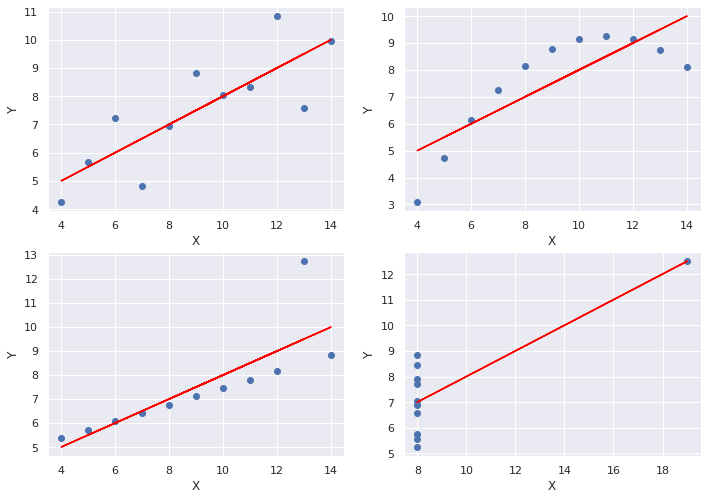

In [19]:
df_group = df.groupby('grupo')
i = 1
for nombre, grupo in df_group:
  x = np.array(grupo['x'].values).reshape(-1, 1) # Formato de vector
  y = np.array(grupo['y'].values).reshape(-1, 1)
  modelo = LinearRegression()
  modelo.fit(x, y) # función para estimar la regresión lineal
  y_pred = modelo.predict(x) # predice el valor de Y para los valores de x
  plt.subplot(2, 2, i) # coloca los 4 gráficos en orden
  i = i+1
  plt.scatter(x, y)
  plt.plot(x, y_pred, color='red')
  plt.xlabel("X")
  plt.ylabel("Y")
  
plt.show()

In [8]:
# Comentarios Pregunta 3
print('De los gráficos se puede inferir que la media y desviación estándar puede ser cercana en los 4 gráficos, sin embargo, la regresión lineal no es adecuada')
print('en el segundo y cuarto gráfico, ya que su comportamiento es parabólico y con una recta vertical respectivamente.')
print('En el tercer gráfico se ve que los puntos se comportan muy linealmente a excepción de 1 punto que sale de la tendencia,')
print('este punto afecta la regresión lineal aumentando su pendiente.')

De los gráficos se puede inferir que la media y desviación estándar puede ser cercana en los 4 gráficos, sin embargo, la regresión lineal no es adecuada
en el segundo y cuarto gráfico, ya que su comportamiento es parabólico y con una recta vertical respectivamente.
En el tercer gráfico se ve que los puntos se comportan muy linealmente a excepción de 1 punto que sale de la tendencia,
este punto afecta la regresión lineal aumentando su pendiente.


In [20]:
# Pregunta 4
# Métricas absolutas
def mae(y, yhat) -> float:
    n = len(y)
    metrica = (1/n)*sum(abs(y-yhat))
    return metrica

def rmse(y, yhat) -> float:
    n = len(y)
    metrica = metrica = (1/n)*sum((y-yhat)**2)
    return metrica

# Métricas porcentuales
def mape(y, yhat) -> float:
    n = len(y)
    metrica = (1/n)*sum(abs((y-yhat)/y))
    return metrica

def smape(y, yhat) -> float:
    n = len(y)
    metrica = (1/n)*sum(abs(y-yhat)/(((abs(y)**2)+(abs(yhat)**2))/2))
    return metrica

def rsquared(y, yhat) -> float:
    mean_y = np.mean(y) # media

    # Cálculo de párametros para obtener R2
    SS_reg = sum((yhat-mean_y)**2)
    SS_res = sum((y-yhat)**2)
    SS_tot = SS_reg + SS_res

    metrica = SS_reg/SS_tot # R^2
    return metrica

df_group = df.groupby('grupo')
v_mae = []
v_mse = []
v_mape = []
v_smape = []
r2 = []
for nombre, grupo in df_group:
  x = np.array(grupo['x'].values).reshape(-1, 1) # Formato de vector
  #y = np.array(grupo['y'].values).reshape(-1, 1)
  y = grupo['y'].values
  modelo = LinearRegression()
  modelo.fit(x, y) # función para estimar la regresión lineal
  y_pred = modelo.predict(x) # predice el valor de Y para los valores de x
  calcular_mae = round(mae(y,y_pred), 4) # calcular las métricas
  calcular_rmse = round(rmse(y,y_pred), 4)
  calcular_mape = round(mape(y,y_pred), 4)
  calcular_smape = round(smape(y,y_pred), 4)
  calcular_rsquared = round(rsquared(y,y_pred), 4)
  v_mae.append(calcular_mae)
  v_mse.append(calcular_rmse)
  v_mape.append(calcular_mape)
  v_smape.append(calcular_smape)
  r2.append(calcular_rsquared)
  
metricas = pd.DataFrame({"Grupo": ["Grupo 1", "Grupo 2", "Grupo 3", "Grupo 4"], "Mean Absolute Error (MAE)":v_mae, "Mean Squared Error (MSE)": v_mse, "Mean Absolute Percentage Error (MAPE)": v_mape,
                         "Symmetric mean absolute percentage error (sMAPE)": v_smape, "R cuadrado": r2})
metricas

,Grupo,Mean Absolute Error (MAE),Mean Squared Error (MSE),Mean Absolute Percentage Error (MAPE),Symmetric mean absolute percentage error (sMAPE),R cuadrado
0,Grupo 1,0.8374,1.2512,0.1213,0.0171,0.6665
1,Grupo 2,0.9679,1.2524,0.1570,0.0232,0.6662
2,Grupo 3,0.7160,1.2506,0.0797,0.0098,0.6663
3,Grupo 4,0.9027,1.2493,0.1347,0.0188,0.6667


In [21]:
# Comentarios Pregunta 4
print("Se puede ver en las métricas que el grupo 3 tiene los errores mas bajos, esto es porque todos sus datos tienden perfectamente a una recta a excepción de un solo valor.")
print("El grupo que peor se ajusta es el grupo 2, donde sus datos tienden más a una parábola en lugar de una recta")

Se puede ver en las métricas que el grupo 3 tiene los errores mas bajos, esto es porque todos sus datos tienden perfectamente a una recta a excepción de un solo valor.
El grupo que peor se ajusta es el grupo 2, donde sus datos tienden más a una parábola en lugar de una recta


[10  8 13  9 11 14  6  4 12  7  5]
[10  8 13  9 11 14  6  4 12  7  5]
[10  8 13  9 11 14  6  4 12  7  5]
[ 8  8  8  8  8  8  8 19  8  8  8]


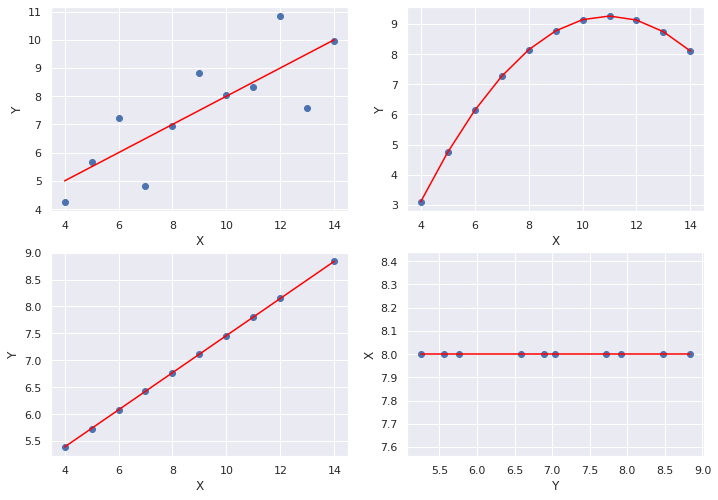

In [22]:
# Pregunta 5
# Comentarios iniciales: 
# En el primer gráfico los datos estan dispersos, pero se ajustan bien a una recta 
# el segundo gráfico se ajusta mejor a una parábola, o polinomio de segundo orden
# el tercer gráfico es una recta, pero tiene un outlier que será eliminado
# el cuarto gráfico es una recta vertical, pero si se cambian los ejes puede ser una recta horizontal, tiene un outlier que será eliminado.
def regresion(x,y,orden):
    modelo = np.poly1d (np.polyfit (x, y, orden)) # calcula los coeficientes del polinomio
    x_pred = sorted(x)
    y_pred = modelo(x_pred)
    return x_pred, y_pred

df_group = df.groupby('grupo')
i = 1
for nombre, grupo in df_group:
  x = grupo['x'].values
  y = grupo['y'].values
  print(x)
  if i == 1:
    x_pred, y_pred = regresion(x,y,1)
  elif i == 2:
    x_pred, y_pred = regresion(x,y,2)
  elif i == 3:
    x = x[y<10] # elimina el outlier
    y = y[y<10]
    x_pred, y_pred = regresion(x,y,1)
  else:
      x = x[y<10] # elimina el outlier
      y = y[y<10]
      x,y = y,x # cambia los ejes
      x_pred, y_pred = regresion(x,y,1)
  if i<4: # condición para formato de los ejes
    plt.subplot(2, 2, i) # coloca los 4 gráficos en orden
    i = i+1
    plt.scatter(x, y)
    plt.plot(x_pred, y_pred, color='red')
    plt.xlabel("X")
    plt.ylabel("Y")
  else:
    plt.subplot(2, 2, i) # coloca los 4 gráficos en orden
    i = i+1
    plt.scatter(x, y)
    plt.plot(x_pred, y_pred, color='red')
    plt.xlabel("Y")
    plt.ylabel("X")
  
#plt.show()